In [1]:
%run ../src/load_data.py

In [2]:
import seaborn as sns
import collections

In [3]:
housing_df.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.00000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,...,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,70.031592,10507.808408,1971.092350,1984.760165,103.75672,442.274983,46.838043,567.197105,1056.310131,1161.551344,...,472.525155,94.412819,46.422467,21.952447,3.430737,15.154376,2.776017,43.758787,2007.815300,180624.101999
std,22.040937,9992.987081,30.190266,20.651334,181.10815,455.369276,161.777324,442.209192,437.914609,385.002532,...,214.171752,125.436852,66.060150,61.108223,29.406940,55.917522,40.301212,497.648467,1.329376,79312.128273
min,21.000000,1300.000000,1872.000000,1950.000000,0.00000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,60.000000,7537.500000,1954.000000,1966.000000,0.00000,0.000000,0.000000,222.000000,795.000000,882.000000,...,327.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129900.000000
50%,70.049958,9477.000000,1972.000000,1993.000000,0.00000,381.000000,0.000000,479.000000,991.000000,1086.000000,...,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,162500.000000
75%,79.000000,11600.000000,2000.000000,2004.000000,166.00000,707.000000,0.000000,808.000000,1297.500000,1391.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.00000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,2010.000000,755000.000000


In [4]:
counter=collections.Counter(housing_df.dtypes)
print(counter)

Counter({category: 56, dtype('int64'): 21, dtype('float64'): 3})


In [5]:
dt = housing_df.dtypes
dt[dt == 'category']

MSSubClass       category
MSZoning         category
LotShape         category
LandContour      category
Utilities        category
LotConfig        category
LandSlope        category
Neighborhood     category
Condition1       category
Condition2       category
BldgType         category
HouseStyle       category
Street           category
Alley            category
OverallQual      category
OverallCond      category
RoofStyle        category
RoofMatl         category
Exterior1st      category
Exterior2nd      category
MasVnrType       category
ExterQual        category
ExterCond        category
Foundation       category
BsmtQual         category
BsmtCond         category
BsmtExposure     category
BsmtFinType1     category
BsmtFinType2     category
Heating          category
HeatingQC        category
CentralAir       category
Electrical       category
BsmtFullBath     category
BsmtHalfBath     category
FullBath         category
HalfBath         category
BedroomAbvGr     category
KitchenAbvGr

## Contingency Tables

In the below contingency tables we look at the relationship of exterior quality to both the property's overall condition and if the property has a paved driveway. Looking at the properties with the best exterior quality ("excellent"), 44 out of 51 have an average overall condition. This tells us that we shouldn't "judge a book by its cover". That is to say, a property with good curb appeal does not necessarily mean that the rest of the house is in excellent condition.

In regards to a paved driveway, we can see that a paved driveway has a large effect on the value of the exterior quality. A property with excellent exterior quality must have a paved driveway.

In [6]:
pd.crosstab(index=housing_df["ExterQual"], columns=housing_df["OverallCond"])

OverallCond,1,2,3,4,5,6,7,8,9
ExterQual,,,,,,,,,
Ex,0,0,0,0,44,1,0,2,4
Fa,1,1,2,4,3,1,2,0,0
Gd,0,1,0,2,405,22,31,11,9
TA,0,3,22,51,362,227,172,59,9


In [7]:
pd.crosstab(index=housing_df["ExterQual"], columns=housing_df["PavedDrive"])

PavedDrive,N,P,Y
ExterQual,,,
Ex,0,0,51
Fa,8,0,6
Gd,5,1,475
TA,77,29,799


## Distribution Plot of Sale Price

The overall distribution of sale prices seems to be close to a normal Bell curve with a slight posivtive skew. We have some properties that were sold at a high price compared to the average sale price, but we have no properties sold on the opposite low end. This makes sense since no property would be given away for practially free (or less than 0 which would mean we are paying people to take the property).

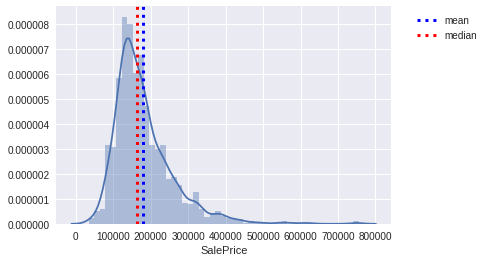

In [8]:
ax = sns.distplot(housing_df['SalePrice'])
ax.axvline(x=housing_df.mean()['SalePrice'], color='blue', linewidth=3, linestyle='dotted', label='mean')
ax.axvline(x=housing_df.median()['SalePrice'], color='red', linewidth=3, linestyle='dotted', label='median')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)

## Pair Plots of Numerical Features

We can validate the common intuition that square footage affects the price of a home. The plots show that a larger lot, basement, garage or porch will generally have a higher sale price. Interestingly, we don't see pool size having much of an effect on the sale price. I guess we don't care about pools in Ames, Iowa!

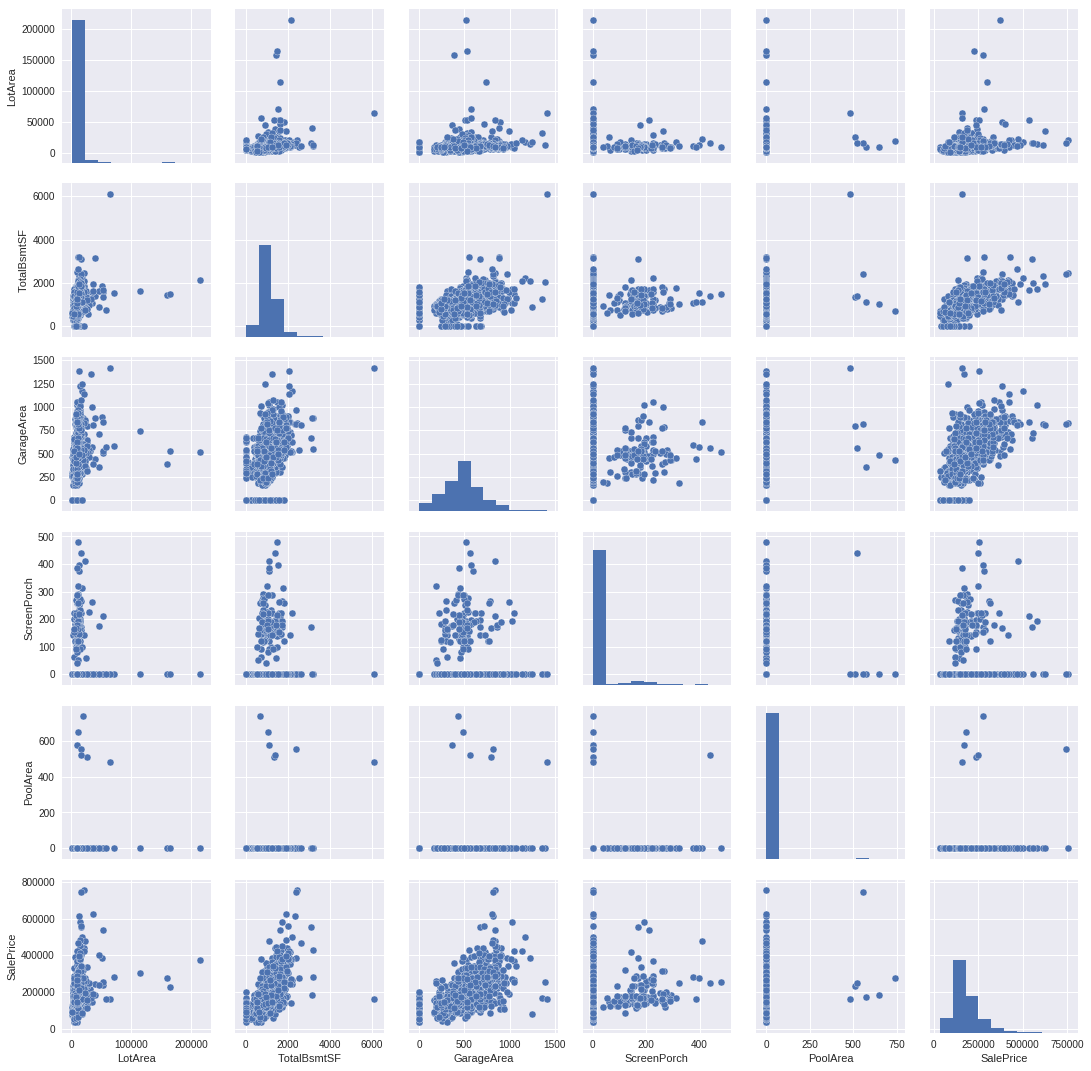

In [9]:
sns.pairplot(housing_df[['LotArea', 'TotalBsmtSF', 'GarageArea', 'ScreenPorch', 'PoolArea', 'SalePrice']])

## Distribution Plot
## Paved Driveway VS Sale Price

The overlay of paved driveway categories' distributions show how the average sale price is higher for having a paved drive way vs a dirt driveway.

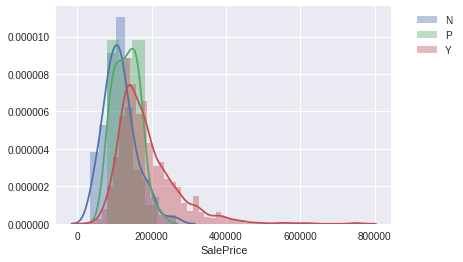

In [10]:
for c in list(housing_df.PavedDrive.cat.categories):
    ax = sns.distplot(housing_df[housing_df['PavedDrive'] == c]['SalePrice'], label=c)

ax.legend(bbox_to_anchor=(1.05, 1), loc=2)